# 1.Data Preprocessing

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings;
warnings.filterwarnings('ignore');

In [2]:
credit_card= pd.read_csv("D:\Python\Projects\Credit Card Fraud Detection\creditcard.csv")

In [3]:
credit_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Dataset Information

In [5]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 2. Exploratory Data Analysis

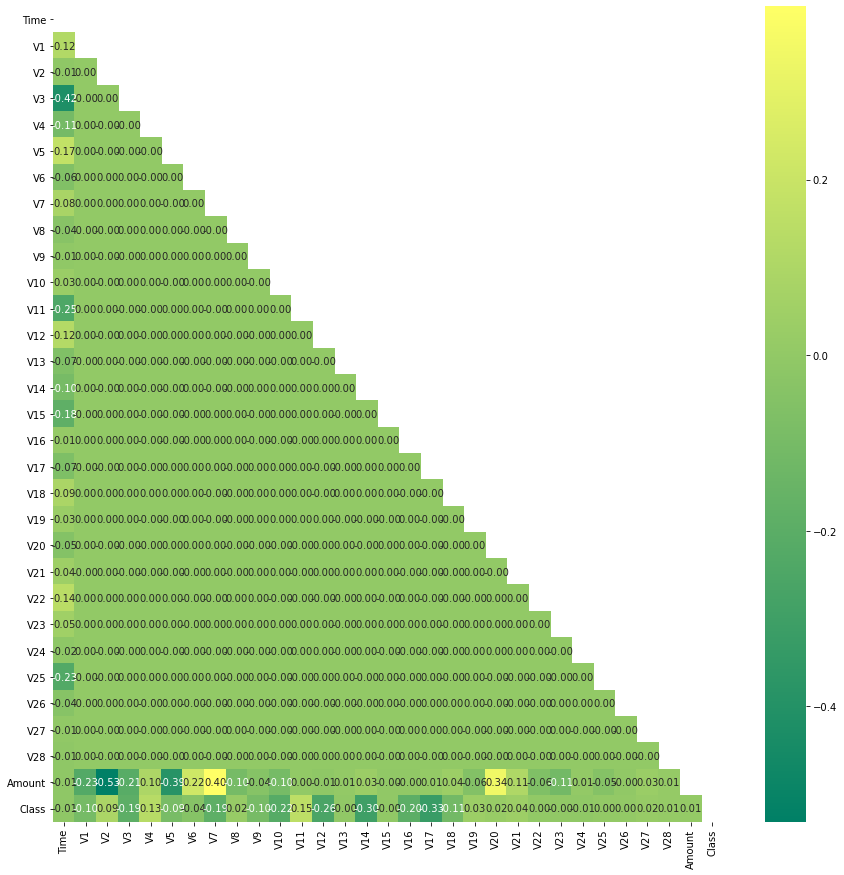

In [53]:
plt.figure(figsize=(15,15))
mask = np.triu(credit_card.corr())
sns.heatmap(credit_card.corr(), fmt='0.2f', cmap='summer', mask=mask, annot=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

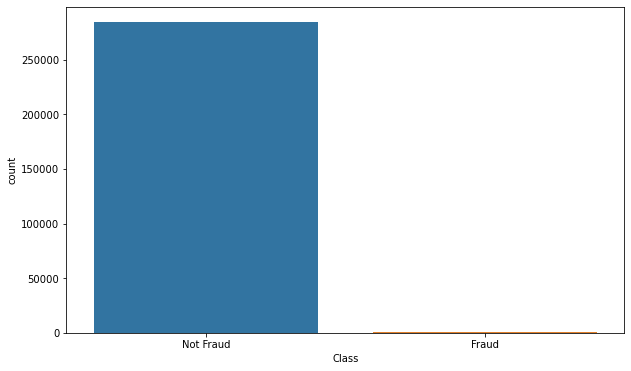

In [56]:
plt.figure(figsize=(10,6))
g = sns.countplot(credit_card['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show

# Chceking the number of missing values in each column

In [6]:
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Distrubution of legit transaction and frauduleant transaction

In [7]:
credit_card['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This dataset is highly unbalenced

0--> Normal Transaction

1--> Fraudulent Transaction

In [8]:
#Seperating the data for analysis

legit= credit_card[credit_card.Class==0]

fraud= credit_card[credit_card.Class==1]

In [9]:
print(legit.shape)

(284315, 31)


In [10]:
print(fraud.shape)

(492, 31)


In [11]:
#statiscal measures of the data

In [12]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
#compare values for both transactions

In [14]:
credit_card.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under-Sampling

Build a sample dataset containing similar distribution od normal transaction and fraudulent transactions

Number of fraudulent transaction: 492

In [15]:
legit_sample=legit.sample(492)

In [16]:
legit_sample.shape

(492, 31)

In [17]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
new_dataset=pd.concat([legit_sample,fraud], axis=0)

In [19]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
172084,120952.0,-0.120485,0.727657,-0.211121,-0.430115,1.170269,-0.458623,0.835990,-0.034125,-0.374345,...,0.202760,0.742252,-0.266614,0.762455,0.066335,0.611781,0.014346,0.066795,12.00,0
31880,36549.0,1.096299,-0.271240,0.562587,-0.106574,-0.459898,0.090153,-0.370497,0.146321,0.071919,...,-0.098988,-0.398178,0.079700,-0.248755,-0.054077,0.813692,-0.057397,0.008228,58.61,0
54545,46498.0,-0.163681,-2.394980,1.098012,2.331975,-1.984710,0.733477,-0.138394,0.130755,1.576845,...,0.329096,0.000810,-0.672408,0.470372,0.330626,-0.294959,-0.011251,0.152486,658.00,0
266084,162182.0,-0.215549,1.228182,-0.644183,-0.464729,0.528631,-0.844049,0.699719,0.195236,-0.255939,...,0.408298,1.298149,-0.048430,0.781715,-0.726357,-0.252275,0.381843,0.267821,5.49,0
9704,14467.0,1.160380,-0.102177,0.864903,0.161608,-0.595101,-0.046769,-0.620615,0.085371,1.482501,...,0.012081,0.291294,0.001924,0.033179,0.102005,1.043866,-0.077116,-0.007938,15.95,0


In [20]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [21]:
new_dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [22]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93630.306911,0.052431,0.071728,-0.012726,-0.022966,-0.009448,-0.038486,0.078460,0.002739,-0.014562,...,0.005208,0.047694,0.002910,0.007868,0.023754,0.027574,0.011308,0.009473,0.002571,88.571484
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [24]:
x=new_dataset.drop(columns="Class", axis=1)

In [25]:
y=new_dataset['Class']

In [26]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
172084,120952.0,-0.120485,0.727657,-0.211121,-0.430115,1.170269,-0.458623,0.835990,-0.034125,-0.374345,...,0.006679,0.202760,0.742252,-0.266614,0.762455,0.066335,0.611781,0.014346,0.066795,12.00
31880,36549.0,1.096299,-0.271240,0.562587,-0.106574,-0.459898,0.090153,-0.370497,0.146321,0.071919,...,0.066846,-0.098988,-0.398178,0.079700,-0.248755,-0.054077,0.813692,-0.057397,0.008228,58.61
54545,46498.0,-0.163681,-2.394980,1.098012,2.331975,-1.984710,0.733477,-0.138394,0.130755,1.576845,...,1.174786,0.329096,0.000810,-0.672408,0.470372,0.330626,-0.294959,-0.011251,0.152486,658.00
266084,162182.0,-0.215549,1.228182,-0.644183,-0.464729,0.528631,-0.844049,0.699719,0.195236,-0.255939,...,-0.070535,0.408298,1.298149,-0.048430,0.781715,-0.726357,-0.252275,0.381843,0.267821,5.49
9704,14467.0,1.160380,-0.102177,0.864903,0.161608,-0.595101,-0.046769,-0.620615,0.085371,1.482501,...,-0.105751,0.012081,0.291294,0.001924,0.033179,0.102005,1.043866,-0.077116,-0.007938,15.95


In [27]:
y.head()

172084    0
31880     0
54545     0
266084    0
9704      0
Name: Class, dtype: int64

In [28]:
#SPlit the data into Training and Testing

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y, random_state=2)

In [30]:
x.shape, x_train.shape,x_test.shape

((984, 30), (688, 30), (296, 30))

Model Training

Logistic Regression- Binary Classification Problem

In [32]:
model = LogisticRegression()

Training the model with training data

In [33]:
model.fit(x_train,y_train)

LogisticRegression()

Model Evavluation

Accuracy Score

1. Accuracy on traning data

In [36]:
x_train_prediction=model.predict(x_train)

In [37]:
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [43]:
print("Accuracy Score on Training Data =", training_data_accuracy)


Accuracy Score on Training Data = 0.9447674418604651


2. Accuracy on test data

In [67]:
x_test_prediction=model.predict(x_test)
acc_logisreg=round(accuracy_score(x_test_prediction,y_test) * 100, 2 )

In [68]:
print("Accuracy Score on Training Data =", acc_logisreg)

Accuracy Score on Training Data = 65.54


# Linear Discriminent Analysis

In [58]:
#Import Library for Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Initialize the Linear Discriminant Analysis Classifier
model = LinearDiscriminantAnalysis()

#Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_lda = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Linear Discriminant Analysis Classifier: ', acc_lda )

Accuracy of Linear Discriminant Analysis Classifier:  87.16


# Gaussian Naive Bayes

In [59]:
#Import Library for Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Initialize the Gaussian Naive Bayes Classifier
model = GaussianNB()

#Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_ganb = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes : ', acc_ganb )

Accuracy of Gaussian Naive Bayes :  85.47


# Decision Tree

In [61]:
#Import Library for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

#Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_dtree = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Decision Tree Classifier : ', acc_dtree )

Accuracy of  Decision Tree Classifier :  89.53


# Random Forest

In [63]:


#Import Library for Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialize the Random Forest
model = RandomForestClassifier()

#Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_rf = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Random Forest : ', acc_rf )

Accuracy of  Random Forest :  92.23


# Support Vector Machine

In [65]:

#Import Library for Support Vector Machine
from sklearn import svm

#Initialize the Support Vector Classifier
model = svm.SVC()

#Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_svc = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Support Vector Classifier: ', acc_svc )

Accuracy of Support Vector Classifier:  54.73


# KNN

In [66]:
#Import Library for K Nearest Neighbour Model
from sklearn.neighbors import KNeighborsClassifier

#Initialize the K Nearest Neighbour Model with Default Value of K=5
model = KNeighborsClassifier()

#Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_knn = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN Classifier: ', acc_knn )

Accuracy of KNN Classifier:  65.54


In [69]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,92.23
3,Decision Tree,89.53
1,Linear Discriminant Analysis,87.16
2,Naive Bayes,85.47
0,Logistic Regression,65.54
6,K - Nearest Neighbors,65.54
5,Support Vector Machines,54.73


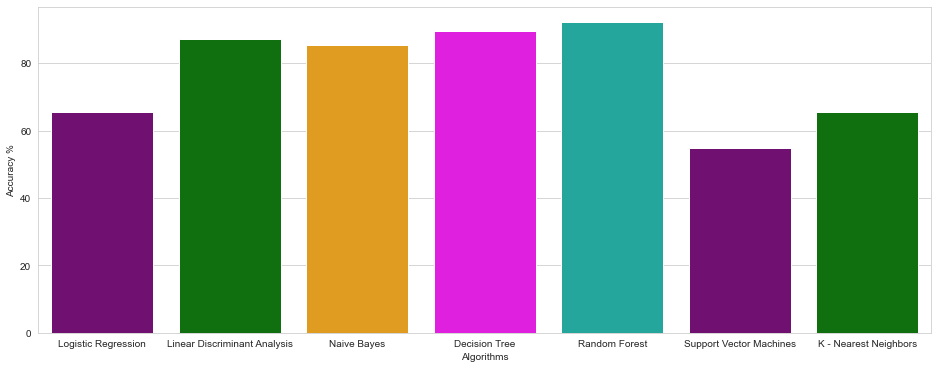

In [77]:
colors = ["purple", "green", "orange", "magenta","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
#plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(models['Model']), y=list(models['Score']), palette=colors)
plt.show()